# Project 5 - Newton's Method - Tutorial
### MATH 1210 - Calculus 1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Dr. Michael Olson &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Fall 2021

## Lesson 5 - Newton's Method
There are times when we want to quickly find the zeroes of a function. There is no function within SageMath or Python that automatically calculates the zeroes. Such functions have been created and put into libraries, but they don't run natively in a Sage or Python environment. We can create a simple function that calculates the zeroes for us. This method is called __Newton's Method__.

The basic principle is that for some initial value $x=a_0$, we can create an approximation of $f(x)$ at $x=a_0$:
$$f(x) \approx L(x) = f(a_0) + f'(a_0)(x-a_0)$$

This linear approximation will have a zero when $L(x)=0$. If this is the case,

$$L(x) = 0 = f(a_0) + f'(a_0)(x-a_0)$$

$$x = a_0 - \frac{f(a_0)}{f'(a_0)}$$

This process is illustrated below. This is an approximation of the zero for $f(x)$. However, you'll notice that the approximated zero (the black point in the figure) is not a very good approximation.
* An interactive version of this process is illustrated on Desmos:
* https://www.desmos.com/calculator/cccpbfodtp

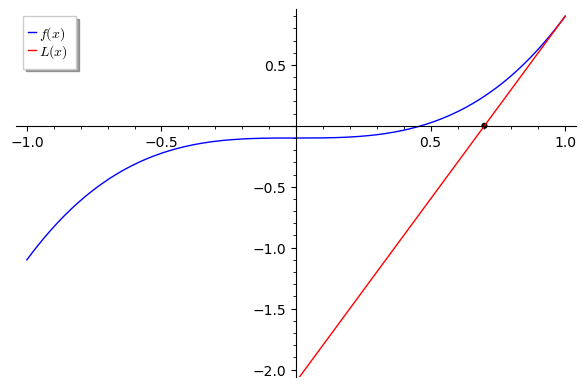

In [1]:
x = var('x')

## Define and plot the function
f(x) = x^3 - 0.1
plt = f(x).plot(legend_label="$f(x)$")

## Find the derivative and define as fp(x)
fp(x) = diff(f(x),x)

## Starting point
a0 = 1

## Linear Approximation
L(x) = f(a0) + fp(a0)*(x-a0)
plt += L(x).plot(color='red', ymin=-2,legend_label="$L(x)$")

## Approximated zero
z = a0 - ( f(a0) / fp(a0) )
plt += plot(point([z,0], color='black', size=20))

plt

But if we treat this approximated zero as a new starting point (let's call it $a_1$), then we can do another linear approximation.

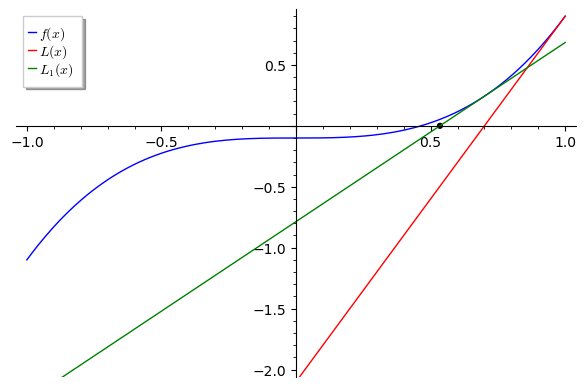

In [2]:
## First approximation = New starting point
a1 = a0 - (f(a0)/fp(a0))

## Linear approximation at a1
L1(x) = f(a1) + fp(a1)*(x-a1)

## New approximated zero
z = a1 - ( f(a1) / fp(a1) )

## Plot
plt = f(x).plot(legend_label="$f(x)$")
plt += L(x).plot(color='red', ymin=-2,legend_label="$L(x)$")
plt += L1(x).plot(color='green', ymin=-2,legend_label="$L_1(x)$")
plt += plot(point([z,0], color='black', size=20))
plt

This approximation is much closer. But can we get even closer still? To do this, we need to __iterate__ through this process multiple times. Here is one way to do it:

In [3]:
## Starting Point
a0 = 1

## First Iteration
a1 = a0 - ( f(a0) / fp(a0) )
print("a1 = ",a1)

## Second Iteration
a2 = a1 - ( f(a1) / fp(a1) )
print("a2 = ", a2)

## Third Iteration
a3 = a2 - ( f(a2) / fp(a2) )
print("a3 = ", a3)

## Fourth Iteration
a4 = a3 - ( f(a3) / fp(a3) )
print("a4 = ",a4)

## Fifth Iteration
a5 = a4 - ( f(a4) / fp(a4) )
print("a5 = ",a5)

## Sixth Iteration
a6 = a5 - ( f(a5) / fp(a5) )
print("a6 = ",a6)

## Seventh Iteration
a7 = a6 - ( f(a6) / fp(a6) )
print("a7 = ",a7)

a1 =  0.700000000000000
a2 =  0.534693877551020
a3 =  0.473054469733817
a4 =  0.464325112518613
a5 =  0.464158942864489
a6 =  0.464158883361286
a7 =  0.464158883361278


Do you see how our approximation is merging to one number? That is the zero of the function $f(x)$. Look at the sequence of points.

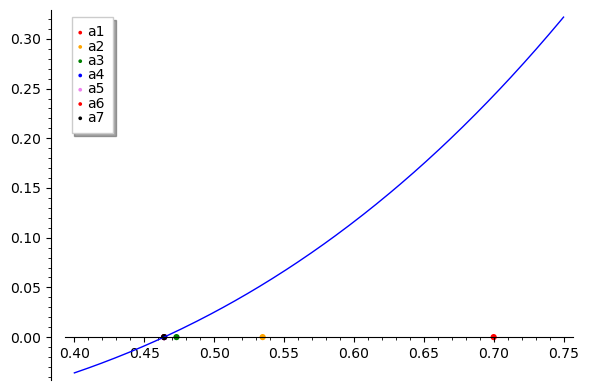

In [4]:
plt = plot(f(x), xmin=0.4, xmax=0.75)
#plt += points([a0,0], color="black", size=20, legend_label = "a0")
plt += points([a1,0], color="red", size=20, legend_label = "a1")
plt += points([a2,0], color="orange", size=20, legend_label = "a2")
plt += points([a3,0], color="green", size=20, legend_label = "a3")
plt += points([a4,0], color="blue", size=20, legend_label = "a4")
plt += points([a5,0], color="violet", size=20, legend_label = "a5")
plt += points([a6,0], color="red", size=20, legend_label = "a6")
plt += points([a7,0], color="black", size=20, legend_label = "a7")

plt

The points $a_4$ through $a_7$ are close enough to the solution that we cannot actually see them at this resolution.

### Limitations
There are times when Newton's Method doesn't work. Here are four such cases:
1. There are some functions where Newton's Method actually moves away from the solution. Consider $f(x) = x^{1/3}$ with a starting point $a_0 = 1$. The iterations produce the approximations:
$$a_1 = -2 \qquad a_2 = 4 \qquad a_3 = -8 \qquad a_4 = 16 \dots$$

2. Similar to this would be when the approximation gives a result not in the domain. Taking $f(x) = x^{1/2}$ and $a_0 = 1$, we get that $a_1 = -1$ which is no longer in the domain of $f(x)$.

3. If you don't select the right starting point, Newton's Method may get stuck in a loop. Look at the function $f(x) = x^3 - 2x + 2$ with $a_0 = 0$ as your starting point. You'll find the iterations produce the approximations:
$$a_1=1 \qquad a_2=0 \qquad a_3=1 \qquad a_4=0\dots$$

4. There are also times when the derivative is zero. When this is the case, the linear approximation will never cross the $x$-axis. To see this, try $f(x)=\sin x$ starting at the point $a_0 = \frac{\pi}{2}$. 

### Key point to remember
When choosing a starting point for your approximation, make sure that the slope of the derivative goes toward the actual zero. If it slopes the away from the actual zero, it may fail.

### For Loops
Let's continue with our original equation, $f(x) = x^3 - 0.1$ and a starting point $a_0=1$ since we know this setup will work. We iterated by physically typing in each iteration. But what if we need 100 iterations to get to a solution? We don't want to type each approximation. We can utilize a *For Loop*. Here is how a for loop works:
* State the four loop, identifying the variable (called an index) that will change
  * Let's call this $i$
* State the numbers we want the index to cycle through
  * In our case, we just want to do $n$ iterations. 
  * We can use `range(n)` to make $i$ go from 0 up to $n$.
    * Note that `range(n)` will include 0, but not include $n$ itself. So `range(n)` cycles through the numbers from 0 to $n-1$. But including the 0, that is $n$ numbers.
* State the command we want to execute
  * Here, this is our iteration
  
Basically, this is what it will look like:
```python
for i in range(n):
    command
```

Here is an example:

In [5]:
for i in range(5):
    print("This is iteration number ",i)

This is iteration number  0
This is iteration number  1
This is iteration number  2
This is iteration number  3
This is iteration number  4


Let's apply this to Newton's Method. 

In [6]:
## Define f(x), f'(x), and Starting Point
f(x) = x^3 - 0.1
fp(x) = diff(f(x),x)
a = 1

## Go through 8 iterations using a for loop
for i in range(8):
    a = a - ( f(a) / fp(a) )
    print("This is iteration number",i+1,"   a = ",a)
    # Notice I am displaying the index i+1. 
    # On the first iteration, i=0, but it should be i=1.
    # So, I just add one to the index

This is iteration number 1    a =  0.700000000000000
This is iteration number 2    a =  0.534693877551020
This is iteration number 3    a =  0.473054469733817
This is iteration number 4    a =  0.464325112518613
This is iteration number 5    a =  0.464158942864489
This is iteration number 6    a =  0.464158883361286
This is iteration number 7    a =  0.464158883361278
This is iteration number 8    a =  0.464158883361278


## Exercise
What is $\sqrt{5}$?

Set $x=\sqrt{5}$ and use this to make a function we want to equal zero:
$$x=\sqrt{5}$$
$$x^2=5$$
$$f(x) = x^2 - 5 = 0$$

We can find the zeroes for $x^2-5$, and that solution will give us $\sqrt{5}$.

In [7]:
## Define f(x), f'(x), and Starting Point
f(x) = x^2 - 5
fp(x) = diff(f(x),x)
a = 1

## Go through 8 iterations using a for loop
for i in range(8):
    a = a - ( f(a) / fp(a) )
    print("This is iteration number",i+1,"   a = ",a)

This is iteration number 1    a =  3
This is iteration number 2    a =  7/3
This is iteration number 3    a =  47/21
This is iteration number 4    a =  2207/987
This is iteration number 5    a =  4870847/2178309
This is iteration number 6    a =  23725150497407/10610209857723
This is iteration number 7    a =  562882766124611619513723647/251728825683549488150424261
This is iteration number 8    a =  316837008400094222150776738483768236006420971486980607/141693817714056513234709965875411919657707794958199867


Whoops! That gave the answer in fractional form. Let's add the `.n()` method to the end of $a$ so it prints as a decimal.

In [8]:
## Define f(x), f'(x), and Starting Point
f(x) = x^2 - 5
fp(x) = diff(f(x),x)
a = 1

## Go through 8 iterations using a for loop
for i in range(8):
    a = a - ( f(a) / fp(a) )
    print("This is iteration number",i+1,"   a = ",a.n())

This is iteration number 1    a =  3.00000000000000
This is iteration number 2    a =  2.33333333333333
This is iteration number 3    a =  2.23809523809524
This is iteration number 4    a =  2.23606889564336
This is iteration number 5    a =  2.23606797749998
This is iteration number 6    a =  2.23606797749979
This is iteration number 7    a =  2.23606797749979
This is iteration number 8    a =  2.23606797749979


So, we conclude that,
$$\sqrt{5} = 2.23607$$